Problem Statement 2: A dataset collected in a cosmetics shop showing details of customers and whether or not they responded to a special offer to buy a new lipstick is shown in the table below. Use this dataset to build a decision tree, with Buys as the target variable, to help in buying lip-sticks in the future. Find the root node of the decision tree. According to the decision tree, you have made from the previous Training data set, what is the decision for the test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]? Write the concluding statement for the implemented application.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=pd.read_csv("data2.csv")

In [42]:
data

,Id,Age,Income,Gender,MaritalStatus,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [43]:
data.shape

(14, 6)

In [44]:
data.iloc[:,1:-1]

,Age,Income,Gender,MaritalStatus
0,<21,High,Male,Single
1,<21,High,Male,Married
2,21-35,High,Male,Single
3,>35,Medium,Male,Single
4,>35,Low,Female,Single
5,>35,Low,Female,Married
6,21-35,Low,Female,Married
7,<21,Medium,Male,Single
8,<21,Low,Female,Married
9,>35,Medium,Female,Single


C:\Users\Renu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

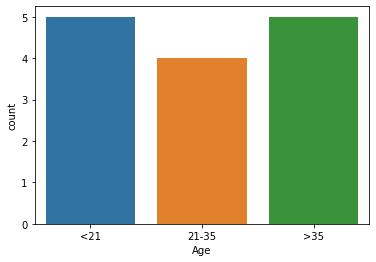

In [45]:
sns.countplot(data['Age'])

C:\Users\Renu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

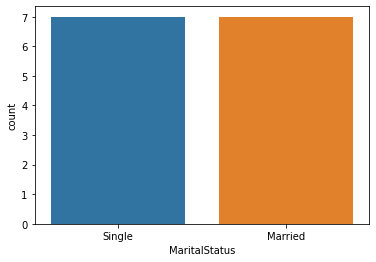

In [46]:
sns.countplot(data['MaritalStatus'])

C:\Users\Renu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

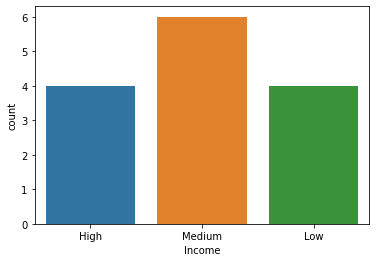

In [47]:
sns.countplot(data['Income'])

<AxesSubplot:xlabel='Income', ylabel='Age'>

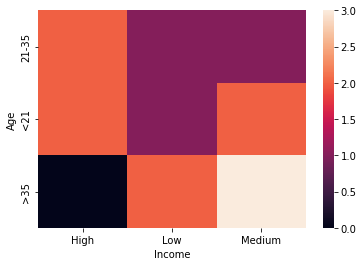

In [48]:
sns.heatmap(pd.crosstab(data['Age'],data['Income']))

In [49]:
# Checking if there any null values

In [50]:
data.isnull().sum()

Id               0
Age              0
Income           0
Gender           0
MaritalStatus    0
Buys             0
dtype: int64

In [51]:
# Checking data type

In [52]:
data.dtypes

Id                int64
Age              object
Income           object
Gender           object
MaritalStatus    object
Buys             object
dtype: object

In [53]:
# Descrbing Data

In [54]:
data.describe()

,Id
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [55]:
data['Buys'].value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

In [56]:
# Applying Label encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data = data.apply(le.fit_transform)

In [58]:
data.head()

,Id,Age,Income,Gender,MaritalStatus,Buys
0,0,1,0,1,1,0
1,1,1,0,1,0,0
2,2,0,0,1,1,1
3,3,2,2,1,1,1
4,4,2,1,0,1,1


In [59]:
# Selecting all columns except last one for x and for y selecting last column

x = data.iloc[:,1:-1].values

y = data.iloc[:,-1].values

# Now applying fit transforming



In [60]:
x

array([[1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 1],
       [2, 2, 1, 1],
       [2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 2, 1, 1],
       [1, 1, 0, 0],
       [2, 2, 0, 1],
       [1, 2, 0, 0],
       [0, 2, 1, 0],
       [0, 0, 0, 1],
       [2, 2, 1, 0]])

In [61]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0,test_size = 0.25)

In [63]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10, 4), (4, 4), (10,), (4,))

In [64]:
# Importing Decision Tree algorithm from sklearn

In [65]:
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier(criterion='entropy')

cls.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [66]:
y_pred = cls.predict(x_test)

In [67]:
y_pred

array([0, 1, 0, 1])

In [68]:
# Now, lets check our model

In [69]:
test1 = np.array([1,1,1,0])
test2 = np.array([1,1,0,0])
test3 = np.array([1,1,0,1])
test4 = np.array([1,1,1,1])


In [70]:
print(cls.predict([test1]))
print(cls.predict([test2]))
print(cls.predict([test3]))
print(cls.predict([test4]))

[0]
[0]
[0]
[0]


In [71]:
from sklearn.metrics import confusion_matrix , accuracy_score

#Confusion Matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[0, 0],
       [2, 2]], dtype=int64)

In [72]:
#Accuracy Score
accuracy_score(y_test , y_pred)

0.5

###  Conclussion :- Root node for dataset is age predicted class [1,1,0,0] is 0 i.e. No